In [1]:
import pandas as pd
import IPython
import numpy as np
import matplotlib.pyplot as plt

import pre_processing
import analysis
import config

import importlib
importlib.reload(pre_processing)
importlib.reload(analysis)

<module 'analysis' from '/Users/anasputhawala/Desktop/Winterproj/src/utils/analysis.py'>

### Loading data

In [2]:
text_file_loc = '/Users/anasputhawala/Desktop/Winterproj/data/data_crawled/tweet_by_ID_17_12_2022__06_18_38.txt.text'
label_file_loc = '/Users/anasputhawala/Desktop/Winterproj/data/data_crawled/tweet_by_ID_17_12_2022__06_18_38.txt.labels'
scraped_tweets_df = pre_processing.sculpt_df(text_file_loc = text_file_loc, labels_loc = label_file_loc)
scraped_tweets_df = pre_processing.convert_to_int(df=scraped_tweets_df)
scraped_tweets_df

,Text,Label
0,Step out and explore. # ️ @ Ellis Island Cafe,0
1,@user @ Cathedral Preparatory School,18
2,RuPaul's Drag Race bingo fun. Drag Queens be S...,9
3,Black History like a Mufffffaaaaaka #blacchyna...,2
4,@ BJ's Restaurant and Brewhouse,8
...,...,...
372435,Couldn't be more stoked to see mama tayblazesc...,9
372436,Dinner indian food (@ Bombay Curry in Melbourne),1
372437,'Tis the season @ Starbucks,17
372438,We voted! #election2016 #vote #proudtobeanamer...,11


Here is what the labels are:

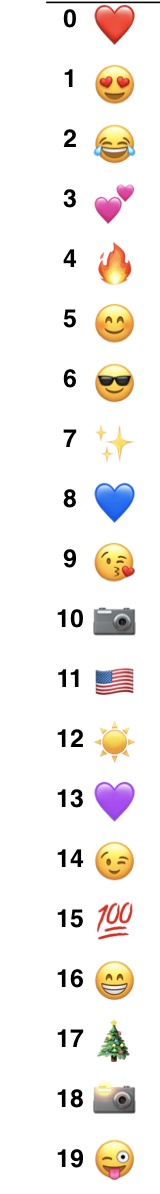

In [3]:
ss_path = '/Users/anasputhawala/Desktop/Winterproj/data/emoji_labels.png'
IPython.display.Image(ss_path)

In [4]:
scraped_tweets_df.Label.value_counts()

0     79923
1     39391
2     38953
4     19473
3     19212
5     17788
6     16590
7     13317
10    12574
9     12251
8     12148
11    11326
15    10435
18    10286
14    10274
12    10080
16    10051
17     9573
13     9465
19     9330
Name: Label, dtype: int64

Few things we can do:
1. Combine labels 13, 8, and 0 into just 0 (red heart)
2. View characteristics of text for all of the different labels (i.e. how much words are in the tweet, which word is most common, etc.)
3. Perform some text-processing perhaps as needed (i.e. removing stop-words, substituting characters for words (@, &), expanding contractions (shouldn't -> should not...))

After this we might want to look into under-sampling to build out a more balanced dataset

1.

In [5]:
scraped_tweets_df = pre_processing.combine_labels(df=scraped_tweets_df, labels_to_combine=[13,8,0])

In [6]:
scraped_tweets_df.Label.value_counts()

0     101536
1      39391
2      38953
4      19473
3      19212
5      17788
6      16590
7      13317
10     12574
9      12251
11     11326
15     10435
18     10286
14     10274
12     10080
16     10051
17      9573
19      9330
Name: Label, dtype: int64

### Text analytics + Pre-processing

Finding out how many words on average per emoji

In [7]:
# Tokenize the text and save it in a series
tokenized_text_series = scraped_tweets_df.Text.apply(lambda row: pre_processing.tokenize(row, lowercase=True))

In [8]:
# Now we can sum the number of elements up per row in that new column with tokenized text
tokenized_text_series

0            [step, out, and, explore, ellis, island, cafe]
1                    [user, cathedral, preparatory, school]
2         [rupauls, drag, race, bingo, fun, drag, queens...
3         [black, history, like, a, mufffffaaaaaka, blac...
4                         [bjs, restaurant, and, brewhouse]
                                ...                        
372435    [couldnt, be, more, stoked, to, see, mama, tay...
372436    [dinner, indian, food, bombay, curry, in, melb...
372437                        [tis, the, season, starbucks]
372438    [we, voted, election2016, vote, proudtobeaname...
372439    [retired, jerseys, wheres, chris, webbers, jer...
Name: Text, Length: 372440, dtype: object

In [9]:
# Get the number of elements in each row of the tokenized text series and save it as num elements
num_elements = tokenized_text_series.apply(lambda row: len(row))

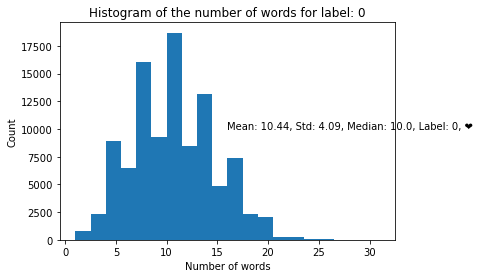

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128248 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128248 missing from current font.
  font.set_text(s, 0, flags=flags)


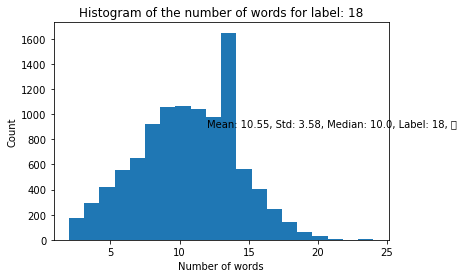

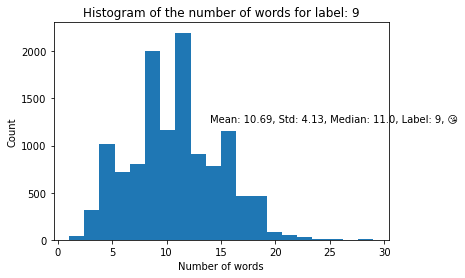

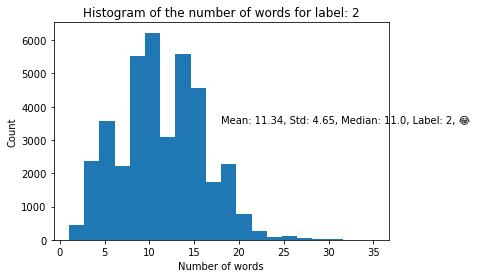

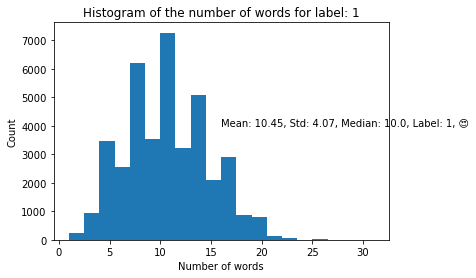

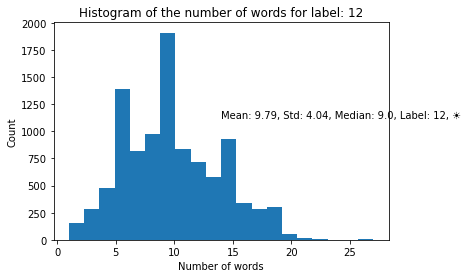

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0, flags=flags)


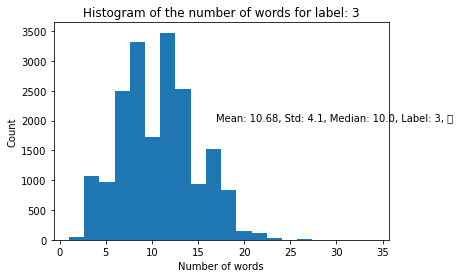

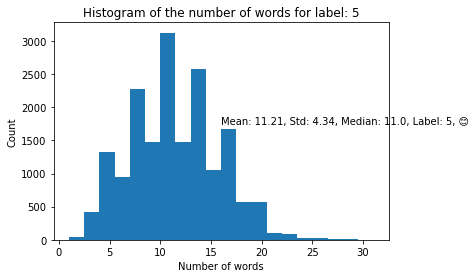

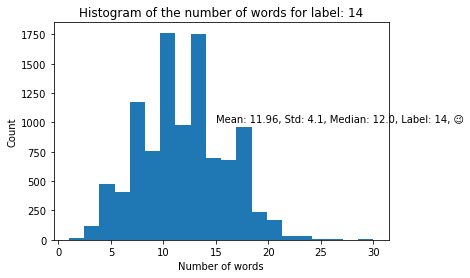

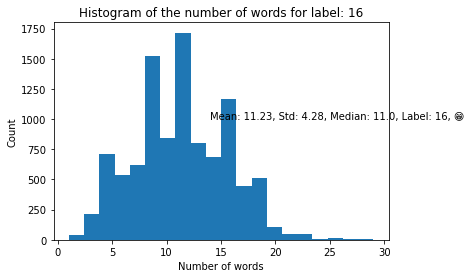

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128247 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128247 missing from current font.
  font.set_text(s, 0, flags=flags)


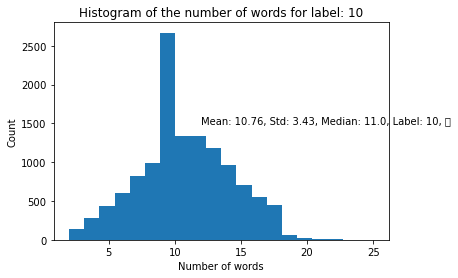

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0, flags=flags)


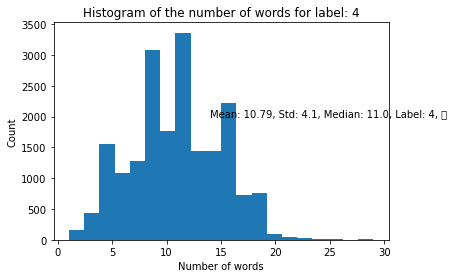

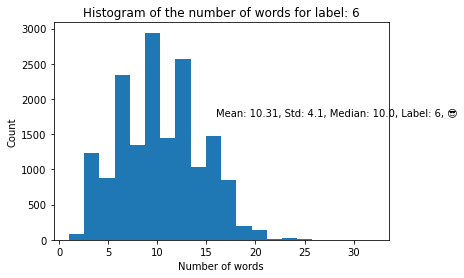

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127876 missing from current font.
  font.set_text(s, 0, flags=flags)


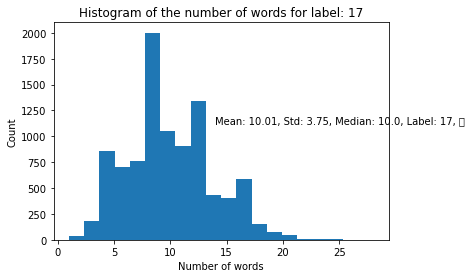

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128175 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128175 missing from current font.
  font.set_text(s, 0, flags=flags)


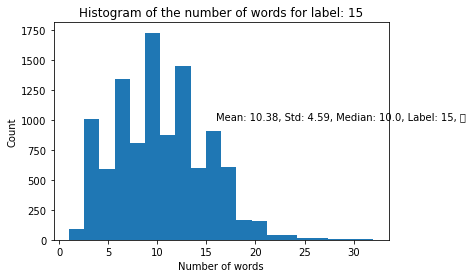

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 10024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 10024 missing from current font.
  font.set_text(s, 0, flags=flags)


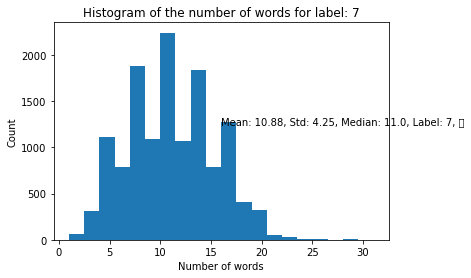

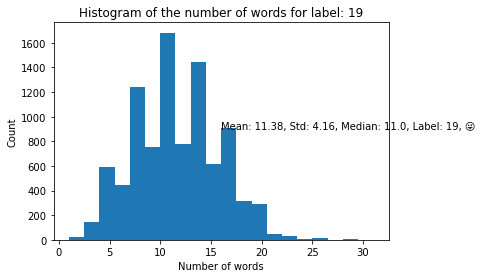

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0, flags=flags)


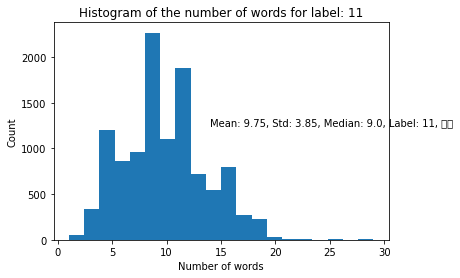

In [10]:
all_labels = scraped_tweets_df.Label.unique()
analysis.plot_average_num_words(num_elements=num_elements, original_df=scraped_tweets_df, labels_to_analyze=all_labels, num_bins=20)

Conclusions:
For all the labels, average number of words is ~11.

Analyzing top words and n-grams in the different labels

{0: '❤', 1: '😍', 2: '😂', 3: '💕', 4: '🔥', 5: '😊', 6: '😎', 7: '✨', 8: '💙', 9: '😘', 10: '📷', 11: '🇺🇸', 12: '☀', 13: '💜', 14: '😉', 15: '💯', 16: '😁', 17: '🎄', 18: '📸', 19: '😜'}


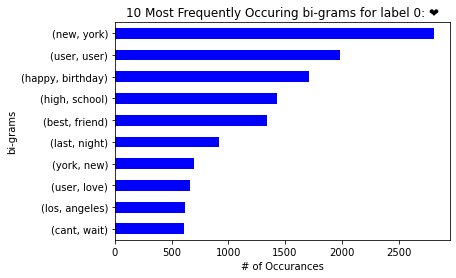

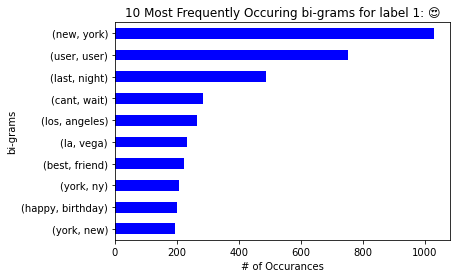

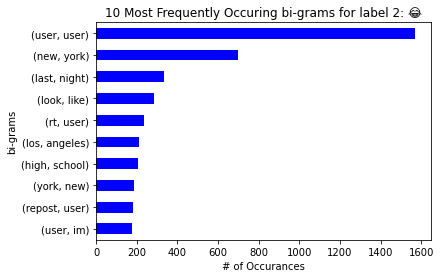

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0, flags=flags)


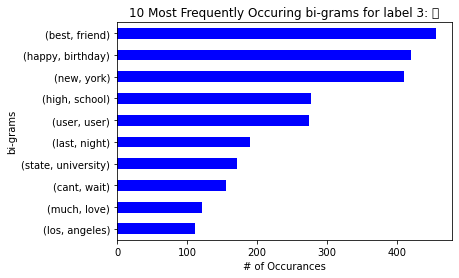

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0, flags=flags)


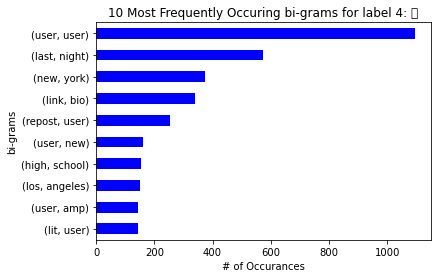

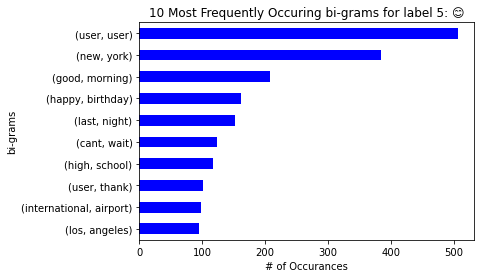

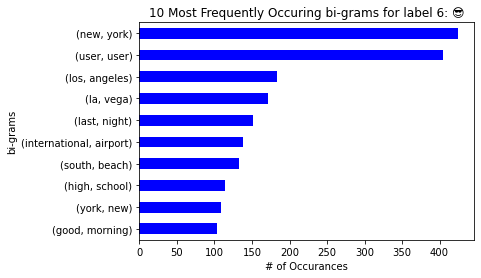

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 10024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 10024 missing from current font.
  font.set_text(s, 0, flags=flags)


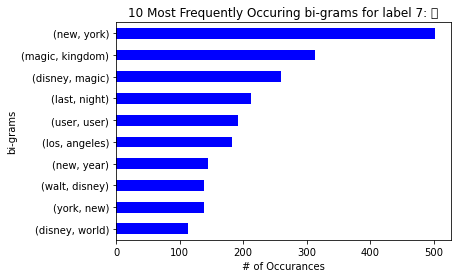

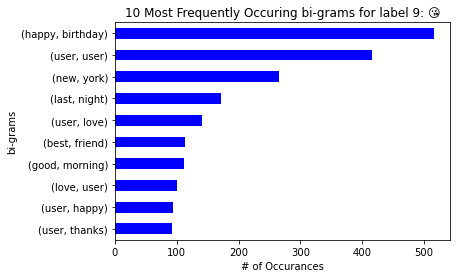

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128247 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128247 missing from current font.
  font.set_text(s, 0, flags=flags)


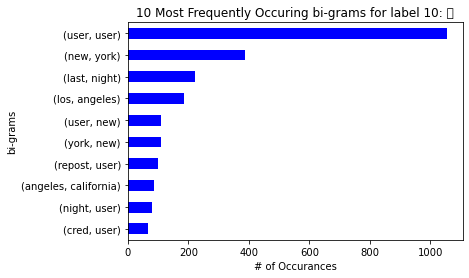

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0, flags=flags)


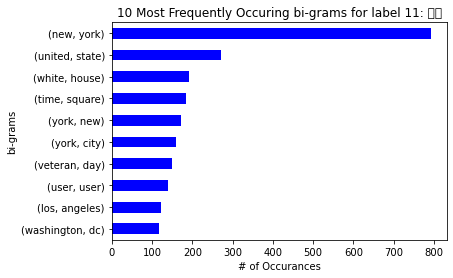

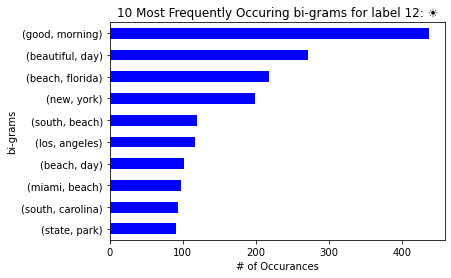

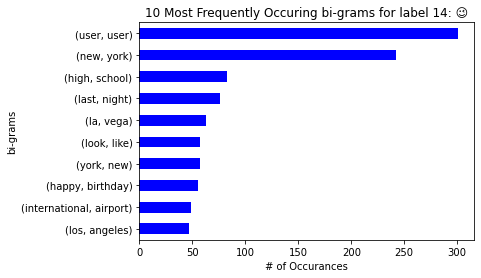

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128175 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128175 missing from current font.
  font.set_text(s, 0, flags=flags)


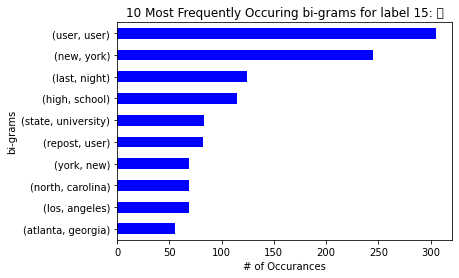

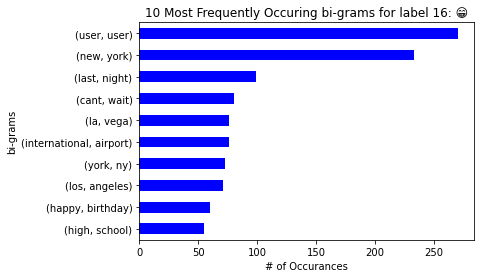

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127876 missing from current font.
  font.set_text(s, 0, flags=flags)


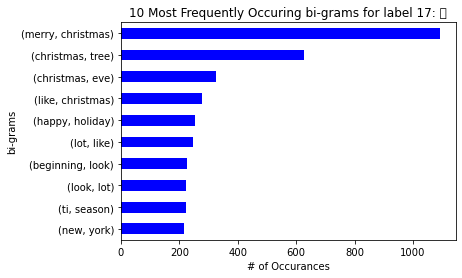

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128248 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128248 missing from current font.
  font.set_text(s, 0, flags=flags)


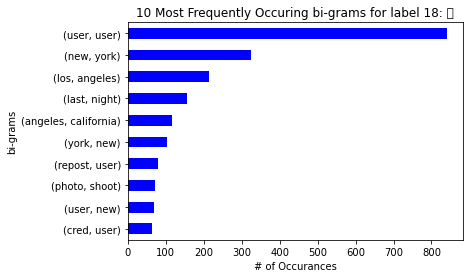

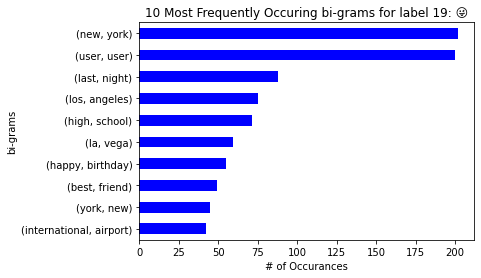

In [11]:
all_labels.sort()
analysis.ngrams_analysis(original_df=scraped_tweets_df, n=2, labels_to_analyze=all_labels)

{0: '❤', 1: '😍', 2: '😂', 3: '💕', 4: '🔥', 5: '😊', 6: '😎', 7: '✨', 8: '💙', 9: '😘', 10: '📷', 11: '🇺🇸', 12: '☀', 13: '💜', 14: '😉', 15: '💯', 16: '😁', 17: '🎄', 18: '📸', 19: '😜'}


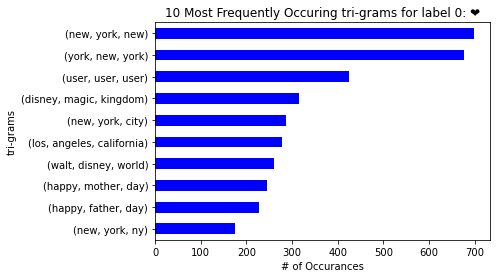

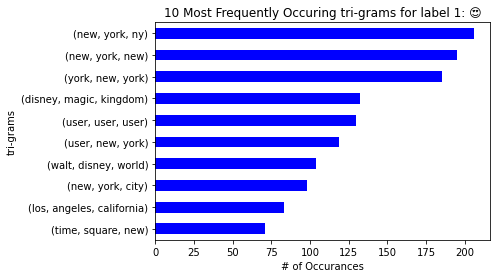

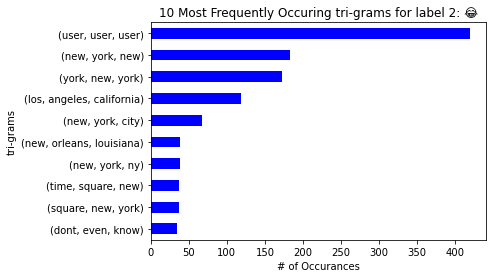

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0, flags=flags)


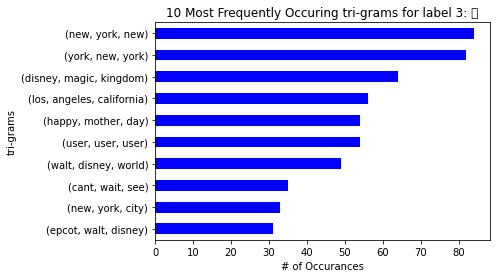

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0, flags=flags)


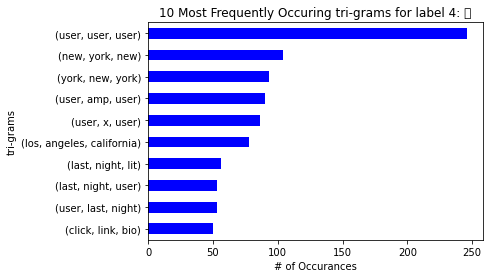

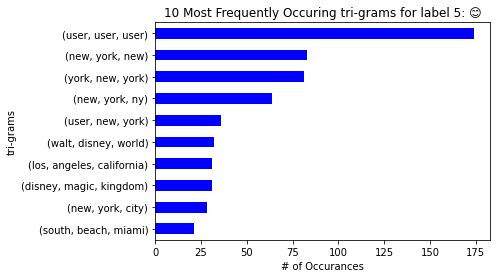

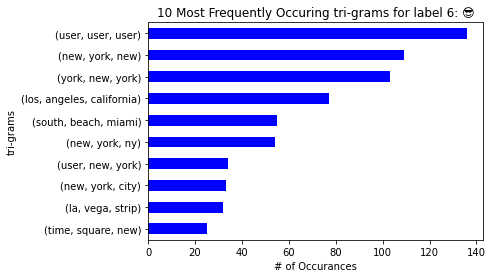

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 10024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 10024 missing from current font.
  font.set_text(s, 0, flags=flags)


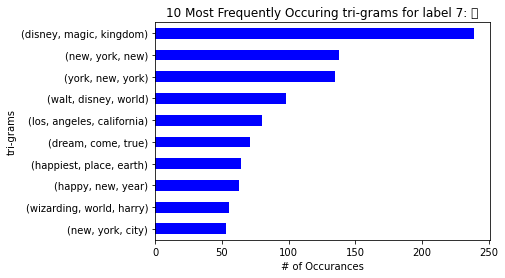

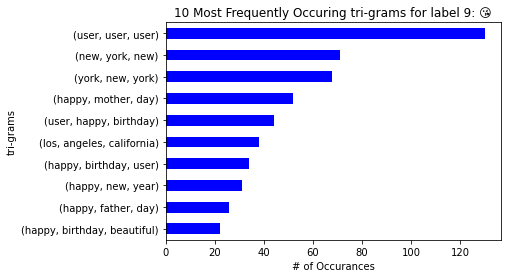

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128247 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128247 missing from current font.
  font.set_text(s, 0, flags=flags)


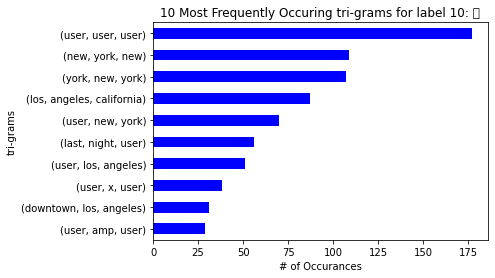

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0, flags=flags)


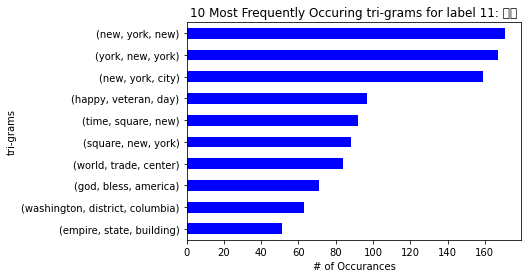

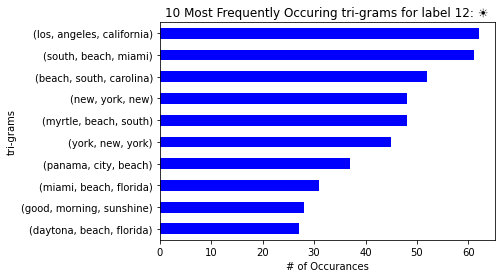

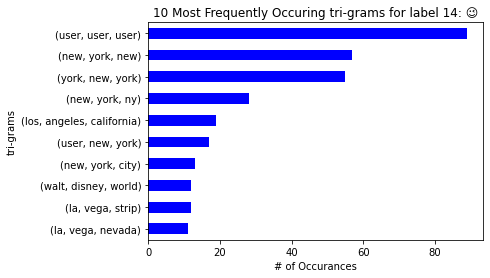

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128175 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128175 missing from current font.
  font.set_text(s, 0, flags=flags)


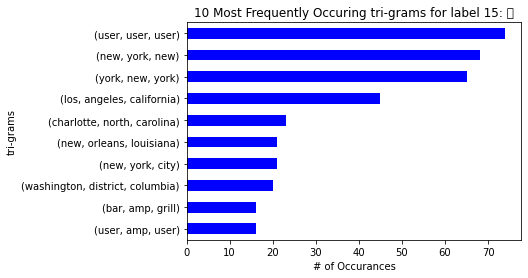

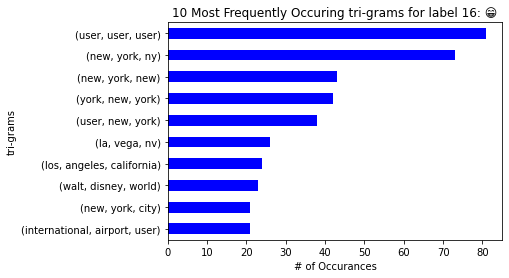

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127876 missing from current font.
  font.set_text(s, 0, flags=flags)


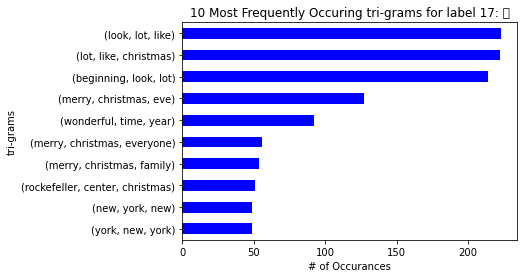

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128248 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128248 missing from current font.
  font.set_text(s, 0, flags=flags)


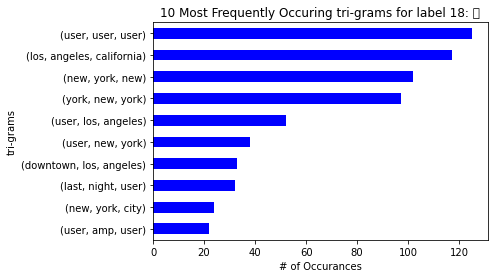

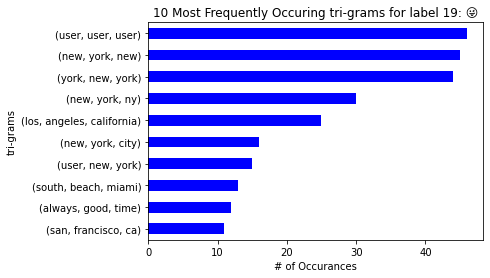

In [12]:
analysis.ngrams_analysis(original_df=scraped_tweets_df, n=3, labels_to_analyze=all_labels)

Okay some things we need to take care of when performing data cleaning:
1. Get rid of words like 'user' because it's obvious that was substituted when preparing the scraped tweets for actual usernames

2. After inspecting the data a bit more, it's obvious that people usually ended tweets etc. with something like @user in LOCATION so we can develop a regex parser to simply remove the @ symbol and anything that follows it if it shows up closer to the end of the tweet. This will also take care of the first thing we need to take care (in step 1) and then we can re-evaluate and run our analysis. A quick and elegant solution is using .partition:

In [13]:
scraped_tweets_df.Text[0]

'Step out and explore. # ️ @ Ellis Island Cafe'

In [14]:
head, sep, tail = scraped_tweets_df.Text[0].partition('@')
print(head)

Step out and explore. # ️ 


Let's perform this cleaning and then re-run a few of our analysis from the previous few cells:

In [15]:
scraped_tweets_df.Text = scraped_tweets_df.Text.apply(lambda row: pre_processing.clean_text(row))
scraped_tweets_df

,Text,Label
0,Step out and explore. # ️,0
1,,18
2,RuPaul's Drag Race bingo fun. Drag Queens be S...,9
3,Black History like a Mufffffaaaaaka #blacchyna...,2
4,,0
...,...,...
372435,Couldn't be more stoked to see mama tayblazesc...,9
372436,Dinner indian food (,1
372437,'Tis the season,17
372438,We voted! #election2016 #vote #proudtobeanamer...,11


Some of them have empty string so let's fix that:

In [16]:
scraped_tweets_df = pre_processing.remove_empty_strings(original_df=scraped_tweets_df)

Found 19201 containing empty string for text and dropped them


Now let's re-run some of our previous analysis to find out how big of an impact this had starting with plotting the average number of words per tweet for the different labels and then moving into n-grams analysis

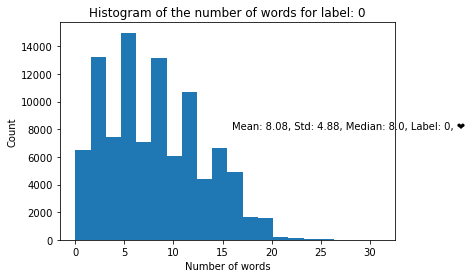

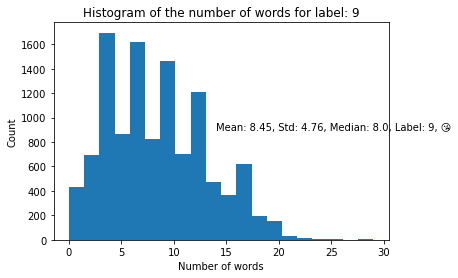

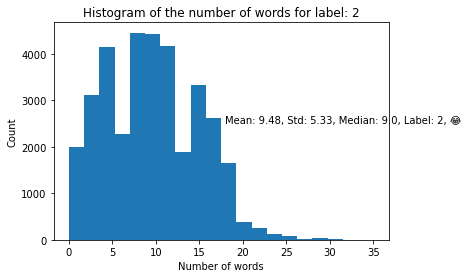

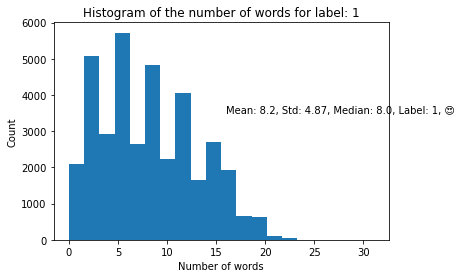

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128248 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128248 missing from current font.
  font.set_text(s, 0, flags=flags)


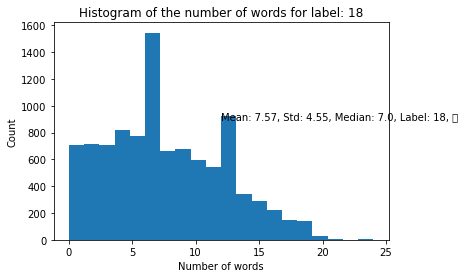

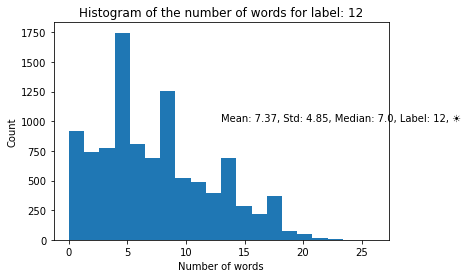

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0, flags=flags)


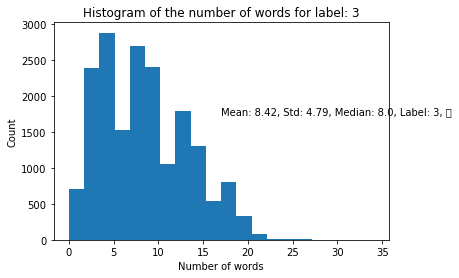

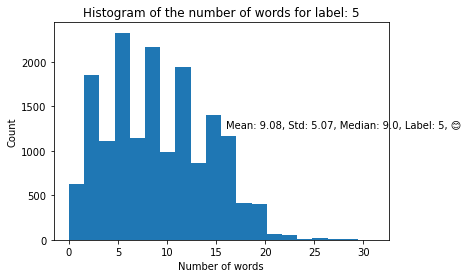

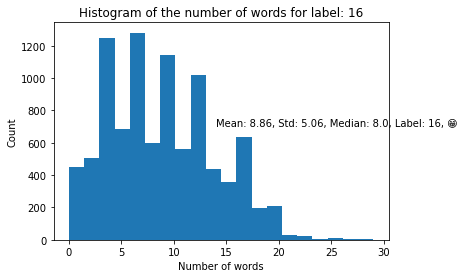

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128247 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128247 missing from current font.
  font.set_text(s, 0, flags=flags)


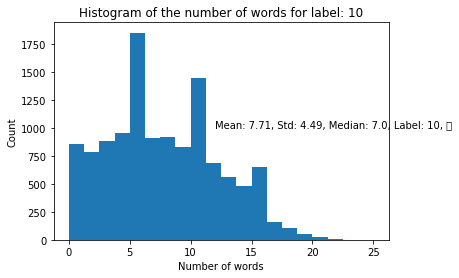

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0, flags=flags)


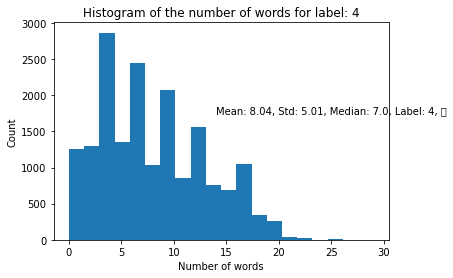

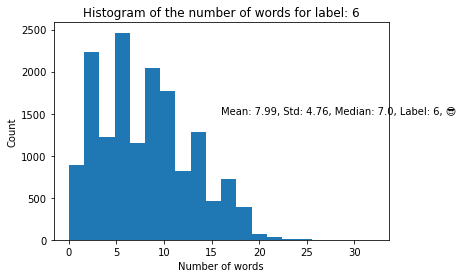

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127876 missing from current font.
  font.set_text(s, 0, flags=flags)


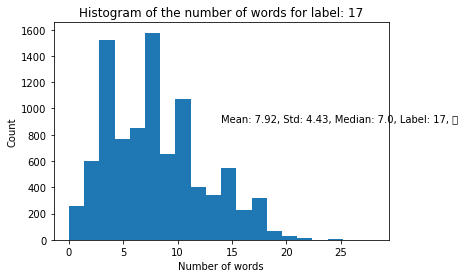

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128175 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128175 missing from current font.
  font.set_text(s, 0, flags=flags)


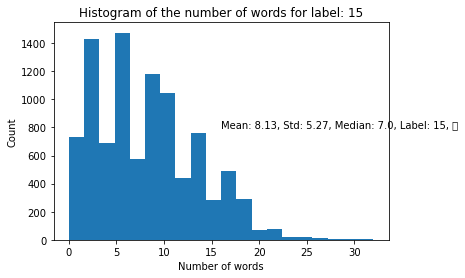

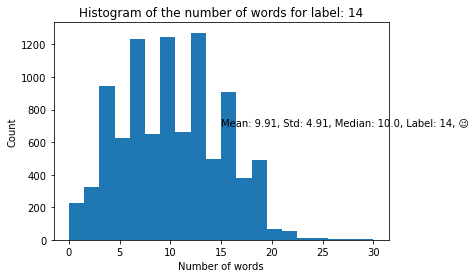

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 10024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 10024 missing from current font.
  font.set_text(s, 0, flags=flags)


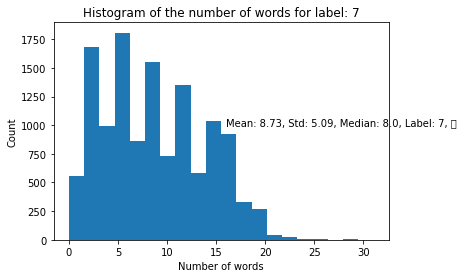

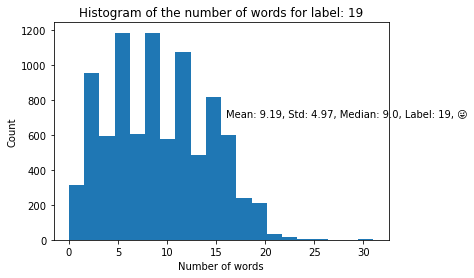

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0, flags=flags)


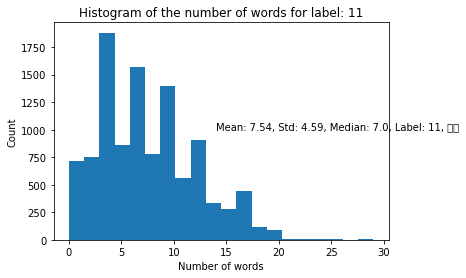

In [17]:
# Tokenize the text and save it in a series
tokenized_text_series = scraped_tweets_df.Text.apply(lambda row: pre_processing.tokenize(row, lowercase=True))

num_elements = tokenized_text_series.apply(lambda row: len(row))

all_labels = scraped_tweets_df.Label.unique()
analysis.plot_average_num_words(num_elements=num_elements, original_df=scraped_tweets_df, labels_to_analyze=all_labels, num_bins=20)

Bi-grams

{0: '❤', 1: '😍', 2: '😂', 3: '💕', 4: '🔥', 5: '😊', 6: '😎', 7: '✨', 8: '💙', 9: '😘', 10: '📷', 11: '🇺🇸', 12: '☀', 13: '💜', 14: '😉', 15: '💯', 16: '😁', 17: '🎄', 18: '📸', 19: '😜'}


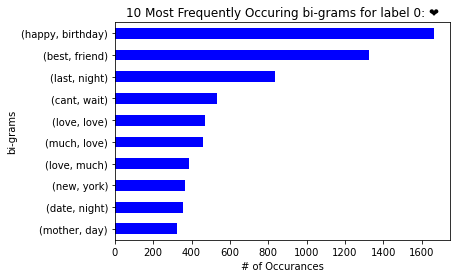

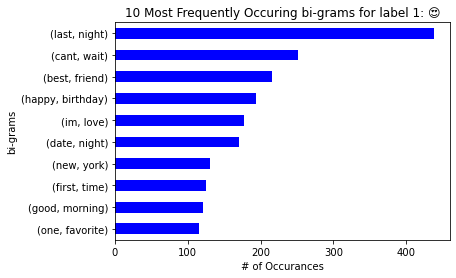

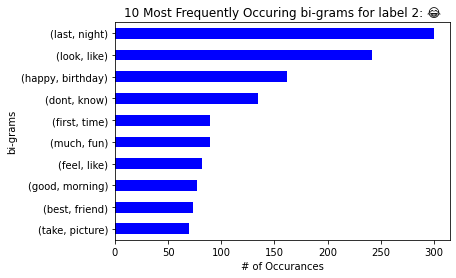

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0, flags=flags)


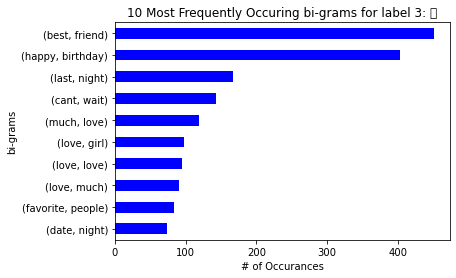

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0, flags=flags)


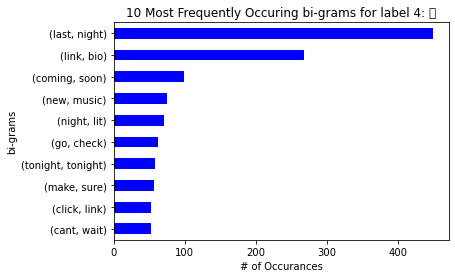

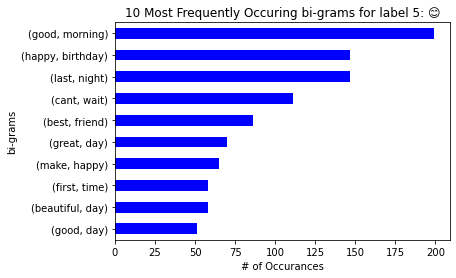

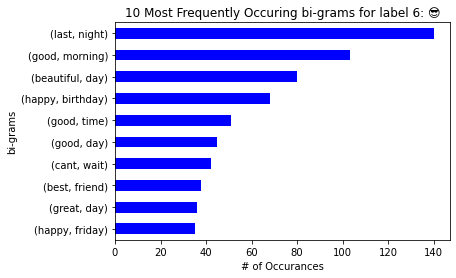

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 10024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 10024 missing from current font.
  font.set_text(s, 0, flags=flags)


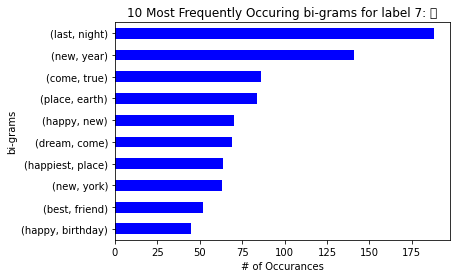

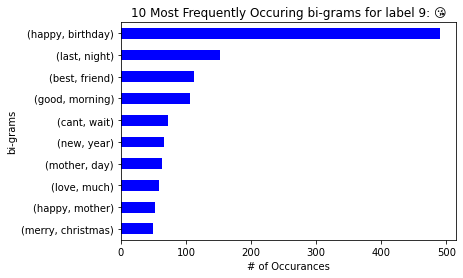

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128247 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128247 missing from current font.
  font.set_text(s, 0, flags=flags)


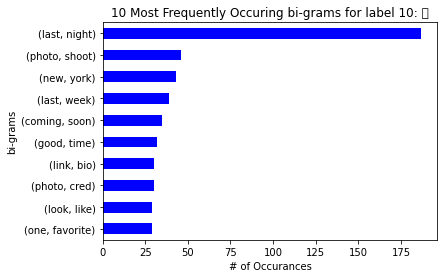

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0, flags=flags)


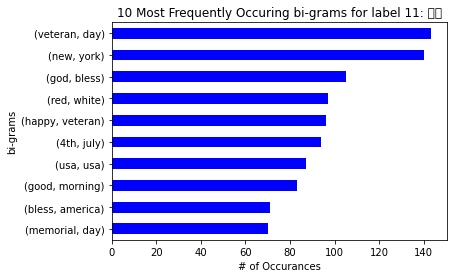

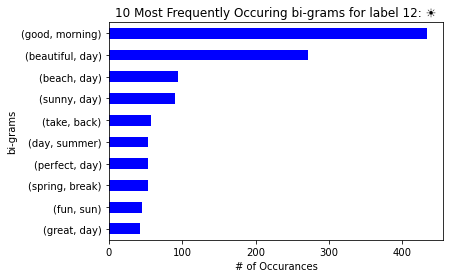

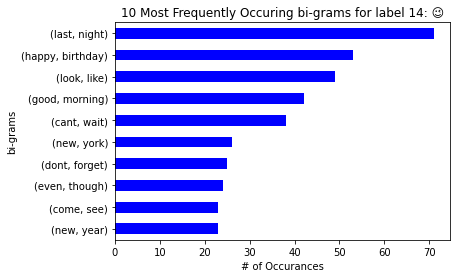

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128175 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128175 missing from current font.
  font.set_text(s, 0, flags=flags)


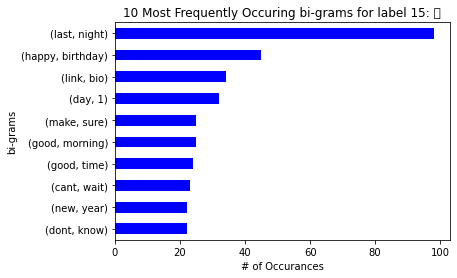

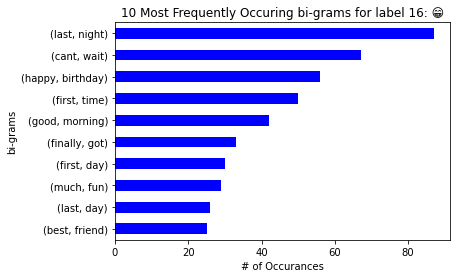

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127876 missing from current font.
  font.set_text(s, 0, flags=flags)


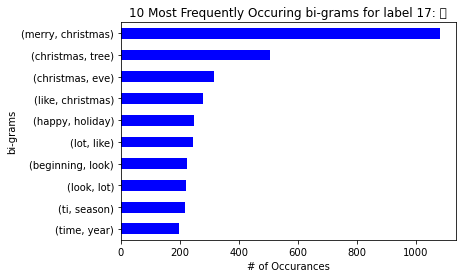

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128248 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128248 missing from current font.
  font.set_text(s, 0, flags=flags)


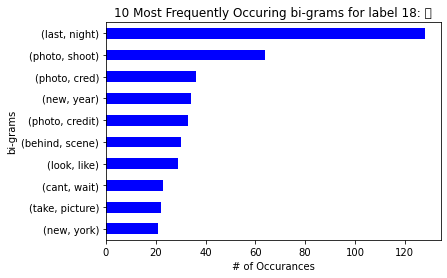

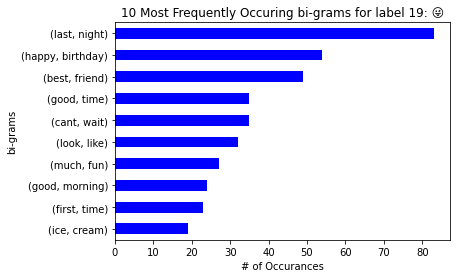

In [18]:
all_labels.sort()
analysis.ngrams_analysis(original_df=scraped_tweets_df, n=2, labels_to_analyze=all_labels)

Tri-grams

{0: '❤', 1: '😍', 2: '😂', 3: '💕', 4: '🔥', 5: '😊', 6: '😎', 7: '✨', 8: '💙', 9: '😘', 10: '📷', 11: '🇺🇸', 12: '☀', 13: '💜', 14: '😉', 15: '💯', 16: '😁', 17: '🎄', 18: '📸', 19: '😜'}


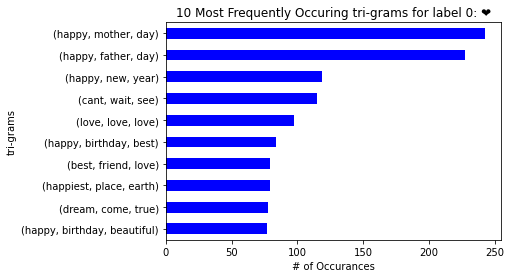

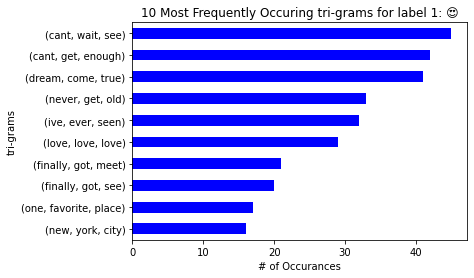

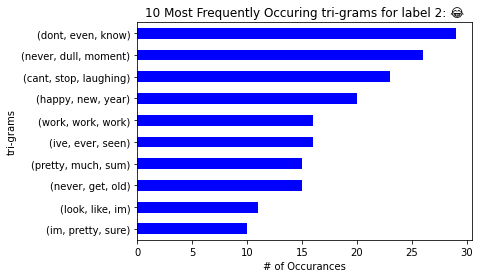

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0, flags=flags)


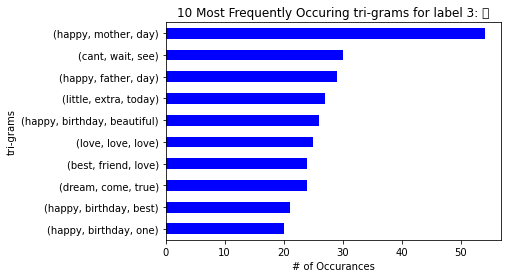

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0, flags=flags)


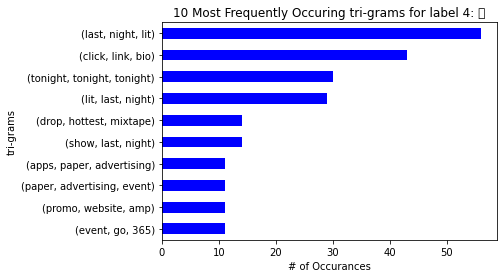

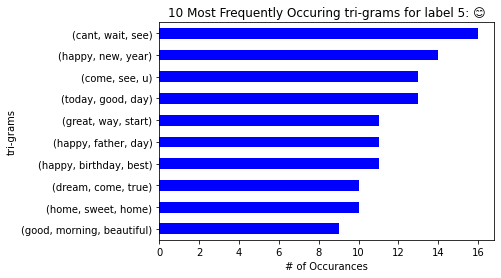

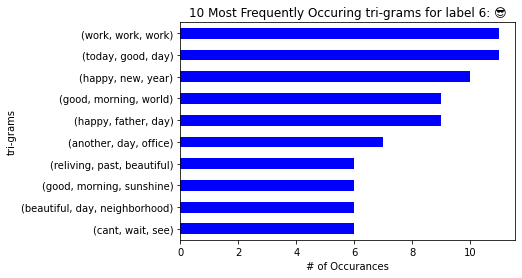

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 10024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 10024 missing from current font.
  font.set_text(s, 0, flags=flags)


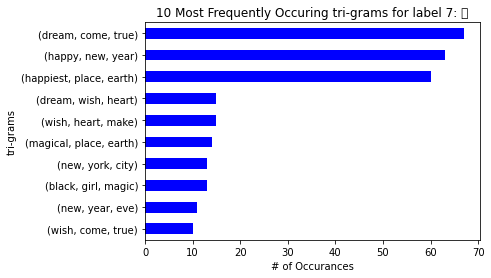

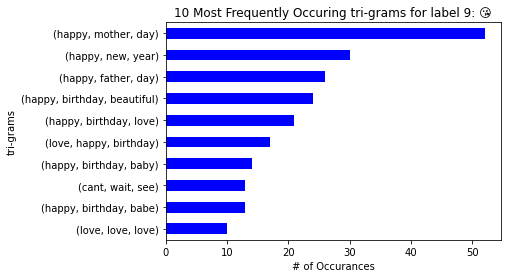

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128247 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128247 missing from current font.
  font.set_text(s, 0, flags=flags)


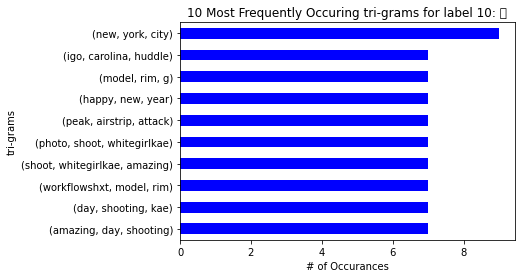

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0, flags=flags)


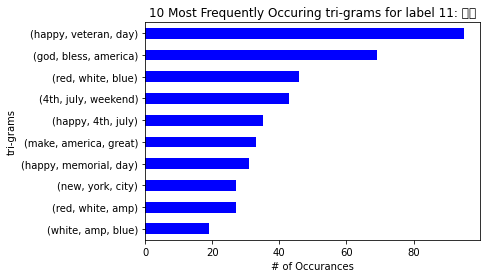

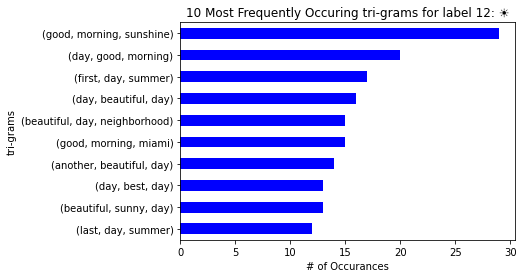

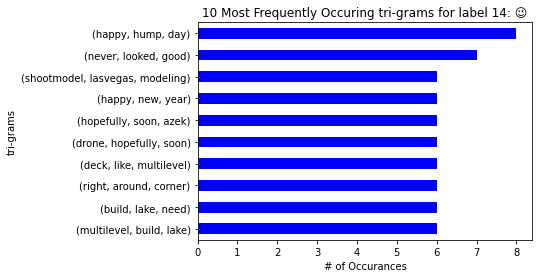

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128175 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128175 missing from current font.
  font.set_text(s, 0, flags=flags)


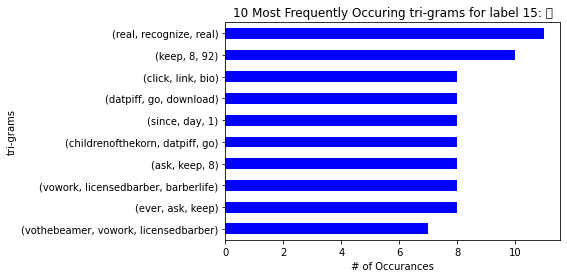

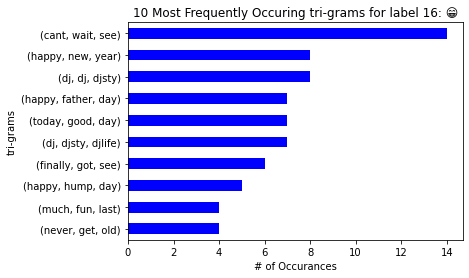

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127876 missing from current font.
  font.set_text(s, 0, flags=flags)


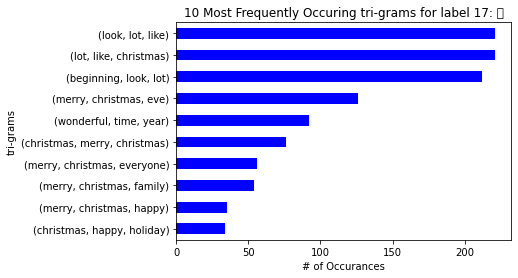

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128248 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128248 missing from current font.
  font.set_text(s, 0, flags=flags)


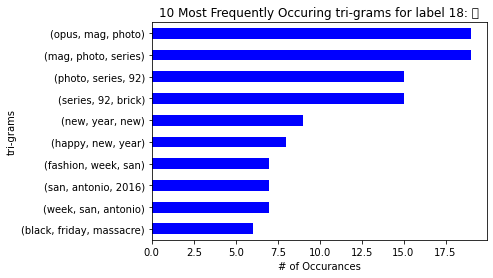

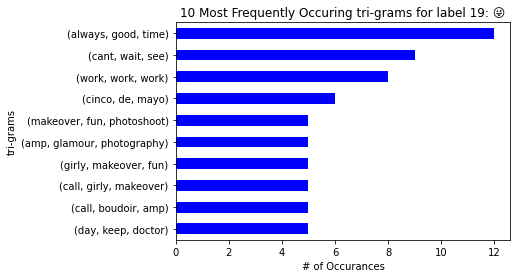

In [19]:
analysis.ngrams_analysis(original_df=scraped_tweets_df, n=3, labels_to_analyze=all_labels)

Definitely a noticeable difference. Not just in this analysis but I'm also anticipating that when we apply a model to train this will have a positive impact. There's certainly a difference when it comes to mean tweet length.

One thing we need to take care of is any imbalance present in the dataset labels

In [20]:
scraped_tweets_df.Label.value_counts()

0     98669
1     37290
2     34967
3     18577
4     17909
5     16582
6     15597
7     12760
10    12140
9     11371
11    10723
12    10026
18     9842
14     9618
15     9614
16     9410
17     9249
19     8895
Name: Label, dtype: int64

We have a lot of data for label 0. We need to undersample but not to the point where it's the same as some of the other labels. For example, it's inherent that in tweets / texting a label 0 (heart) should be occurring more often than a label 17 (christmas tree) to maintain that property, I'll remove some of the label 0 data but not all of it (i.e. I'll still keep label 0 to have more data ~40k data).

When we undersample though I want to refrain from just randomly picking stuff to drop. I want to drop more of the outliers for example, so we need to identify characteristic ssuch as:
1. Length of tweet (i.e. if it's like greater or less by 2 - 3 standard deviation from the mean then drop it)

In [21]:
round(scraped_tweets_df.Label.value_counts() / len(scraped_tweets_df) * 100, 2)

0     27.93
1     10.56
2      9.90
3      5.26
4      5.07
5      4.69
6      4.42
7      3.61
10     3.44
9      3.22
11     3.04
12     2.84
18     2.79
14     2.72
15     2.72
16     2.66
17     2.62
19     2.52
Name: Label, dtype: float64

A large majority of the labels are in the top 4 - 5 so we'll focus on those

In [22]:
labels_to_clean = [0,1,2,3,4,5,6]

In [23]:
scraped_tweets_df =pre_processing.drop_outliers(original_df=scraped_tweets_df, labels_to_clean=labels_to_clean, tokenized_text=tokenized_text_series, z=3)

For label: 0 there are a total of 155 outliers when considering z=3
For label: 1 there are a total of 41 outliers when considering z=3
For label: 2 there are a total of 123 outliers when considering z=3
For label: 3 there are a total of 28 outliers when considering z=3
For label: 4 there are a total of 17 outliers when considering z=3
For label: 5 there are a total of 25 outliers when considering z=3
For label: 6 there are a total of 19 outliers when considering z=3
Total number of data points cleaned / removed 408


Unfortunately not many were cleaned so let's re-do this cleaning and start dropping random rows

In [24]:
scraped_tweets_df=pre_processing.drop_random_rows(original_df=scraped_tweets_df, labels_to_clean=labels_to_clean, target_size=30000)

For label = 0 there are a total of 68566 rows that will be dropped to get to a target size for this class to 30000
For label = 1 there are a total of 7248 rows that will be dropped to get to a target size for this class to 30000
For label = 2 there are a total of 4924 rows that will be dropped to get to a target size for this class to 30000
Skipping label 3 since there are less values in this class to begin with


In [25]:
scraped_tweets_df.Label.value_counts()

0     30000
1     30000
2     30000
3     18553
4     17896
5     16560
6     15580
7     12747
10    12119
9     11357
11    10708
12    10008
18     9834
14     9609
15     9608
16     9399
17     9236
19     8884
Name: Label, dtype: int64

After tinkering around with the tfidf model it's evident that there is some quality control issues that could stem from the fact that there's too many labels. For example take a look at labels 13 and 10. They're basically the same, camera emoji. The model trying to learn to differentiate between 13 and 10 however is a very tedious task (even to humans)!

So what can we do? Compress the data some more and combine features such as:
1. labels 13 and 10 (camera flashing and camera not flashing). What we'll do is all features with label of 10 will become label 13 (camera not flashing --> camera flashing)

2. Labels 16 and 5 (by the way, see emoji_labels_updated.jpg in the data folder to see which ones I'm referring to). Label 16 will become Label 5.

3. Let's experiment with dropping all labels 11 and 17 (american flag and christmas tree)

In [26]:
scraped_tweets_df.Label = scraped_tweets_df.Label.apply(lambda row: pre_processing.re_order_labels(row)) #re-order labels

In [27]:
scraped_tweets_df.Label.value_counts()

0     30000
1     30000
2     30000
5     25959
13    21953
3     18553
4     17896
6     15580
7     12747
9     11357
11    10708
12    10008
14     9609
15     9608
17     9236
8      8884
Name: Label, dtype: int64

In [28]:
df = pre_processing.drop_specific_labels(df=scraped_tweets_df, labels=[11,17])

For label: 11 there were a total of 10708 rows that will be dropped
For label: 17 there were a total of 9236 rows that will be dropped


In [29]:
df.Label.value_counts()

0     30000
1     30000
2     30000
5     25959
13    21953
3     18553
4     17896
6     15580
7     12747
9     11357
12    10008
14     9609
15     9608
8      8884
Name: Label, dtype: int64

Need to re-order labels since there are some missing now (no 10 and 11):
> 12 gets mapped to 10, 13 to 11, 14 to 12, and 15 to 13. See emoji_labels_updated.png in data

In [30]:
map = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 9:9, 12:10, 13:11, 14:12, 15:13}
df.Label = df.Label.map(lambda row: map[row])

In [31]:
df.to_csv('scraped_tweets2.csv')

Going back to make revisions; let's actually keep the christmas emoji and the american flag and see how our model performs

In [51]:
def map_label(label):
    map={11:14, 17:15}
    return map[label]
process = lambda label: map_label(label)

In [57]:
temp = scraped_tweets_df[(scraped_tweets_df.Label == 17) | (scraped_tweets_df.Label == 11)]
temp.Label = temp.Label.apply(process)

temp

/Users/anasputhawala/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Text,Label
19,just trucking along through the holidays! #che...,15
27,Merry Christmas Eve everybody! #setlist #stand...,15
62,Spending a few days in D.C this week #design #...,14
73,#neilyoung #gaga #dncphilly #phenomenallytalen...,14
83,regram,15
...,...,...
272043,It's beginning to look a lot like #Christmas...,15
272063,The little tree that could,15
272091,So excited about the Christmas Tree Give-A-Way...,15
272095,'Tis the season,15


15 is the christmas tree now, and 14 is the american flag emoji

In [59]:
df_2 = pd.concat(objs=[df,temp])

df_2.Label.value_counts()

df_2.to_csv('scraped_tweets3_flag_christmas.csv')